## Rearrange Dataset for Dataloader

In [1]:
!python restructure_data.py

Transferred 200 images and 200 targets in train set
Transferred 100 images and 100 targets in test set


In [2]:
!python main.py

Train Set:  160
Validation Set:  40
Test Set:  100
cuda
** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** 
Epoch [1/20]
Training
  0%|                                                    | 0/80 [00:20<?, ?it/s]
Traceback (most recent call last):
  File "main.py", line 80, in <module>
    train(model=model, 
  File "/home/jovyan/DLMIA/Project/DLMIA-UNet/trainer.py", line 30, in train
    output = model(data)
  File "/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "/home/jovyan/DLMIA/Project/DLMIA-UNet/unet.py", line 371, in forward
    x, before_pooling = module(x)
  File "/usr/local/lib/python3.8/dist-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "/home/jovyan/DLMIA/Project/DLMIA-UNet/unet.py", line 175, in forward
    y = self.conv1(x)  # convolution 1
  File "/

## Test dataset class

In [2]:
from dataset import *

data_path = 'data/'
data = SegmentationDataSet(data_path, train=True)

In [2]:
data.__len__()

201

In [3]:
x, y = data.__getitem__(3)

NiftiImageIO (0x34fa4b0): data/train/images/patient041_frame01.nii.gz has unexpected scales in sform

NiftiImageIO (0x34fa4b0): data/train/images/patient041_frame01.nii.gz has unexpected scales in sform

NiftiImageIO (0x3cda790): data/train/images/patient041_frame01.nii.gz has unexpected scales in sform

NiftiImageIO (0x3cda790): data/train/images/patient041_frame01.nii.gz has unexpected scales in sform



In [4]:
x.shape

(6, 224, 154)

In [5]:
y.shape

(6, 224, 154)

In [6]:
from transformations import *

x = resize_image(x)

In [8]:
x.shape

(10, 256, 256)

## Test dataset class with transform

In [1]:
from torchvision import transforms
from transformations import *
from dataset import *

train_transform = transforms.Compose([transforms.Lambda(normalise), 
                                     transforms.Lambda(resize_image),
                                     transforms.Lambda(np_to_tensor)])

target_transform = transforms.Compose([transforms.Lambda(reshape_mask),
                                     transforms.Lambda(np_to_tensor)])

data_path = 'data/'
data_transform = SegmentationDataSet(data_path, train=True, transform=train_transform, target_transform=target_transform)

In [2]:
x,y = data_transform.__getitem__(3)

In [3]:
x.shape

torch.Size([40, 256, 256])

In [4]:
y.shape

torch.Size([40, 256, 256])

In [5]:
x[0][50]

tensor([0.0000, 0.2176, 0.5641, 0.6133, 0.3751, 0.1168, 0.0222, 0.0415, 0.0423,
        0.0225, 0.0196, 0.0209, 0.0188, 0.0202, 0.0209, 0.0178, 0.0163, 0.0167,
        0.0152, 0.0139, 0.0156, 0.0187, 0.0195, 0.0175, 0.0166, 0.0166, 0.0139,
        0.0144, 0.0212, 0.0220, 0.0156, 0.0148, 0.0177, 0.0171, 0.0195, 0.0241,
        0.0207, 0.0143, 0.0143, 0.0161, 0.0151, 0.0144, 0.0150, 0.0154, 0.0165,
        0.0190, 0.0238, 0.0336, 0.0500, 0.0698, 0.0908, 0.1136, 0.1388, 0.1598,
        0.1664, 0.1683, 0.1826, 0.1978, 0.1969, 0.1894, 0.1877, 0.1846, 0.1572,
        0.1005, 0.0433, 0.0088, 0.0000, 0.0000, 0.0000, 0.0039, 0.0211, 0.0329,
        0.0409, 0.0472, 0.0458, 0.0433, 0.0547, 0.0779, 0.1051, 0.1369, 0.1655,
        0.1852, 0.2126, 0.2414, 0.2284, 0.1784, 0.1508, 0.1793, 0.2276, 0.2224,
        0.1608, 0.1020, 0.0708, 0.0590, 0.0590, 0.0682, 0.0861, 0.1103, 0.1350,
        0.1516, 0.1544, 0.1512, 0.1643, 0.1915, 0.1979, 0.1722, 0.1373, 0.1166,
        0.1128, 0.1114, 0.1043, 0.0960, 

In [6]:
from torch.utils.data import DataLoader
dataloader_training = DataLoader(dataset=data_transform,
                                 batch_size=4,
                                 shuffle=True)

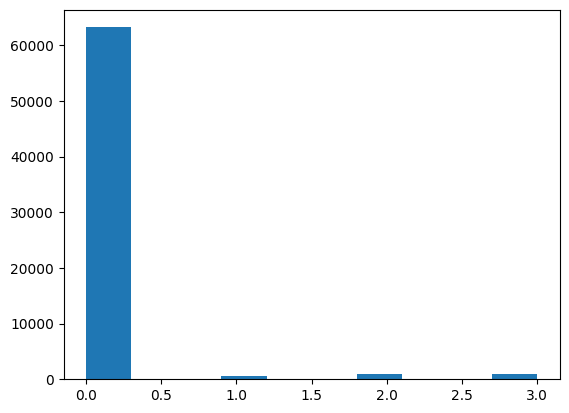

In [7]:
import matplotlib.pyplot as plt
train_iter = iter(dataloader_training)

inputs, targets = next(train_iter)
plt.hist(torch.flatten(targets[0,20,:,:]) ) 
plt.show()

In [8]:
x, y = next(iter(dataloader_training))

In [9]:
x.shape

torch.Size([4, 10, 256, 256])

In [19]:
y.shape

torch.Size([4, 10, 256, 256])

In [10]:
x[None, :].shape


torch.Size([1, 4, 10, 256, 256])

In [22]:
!python main2.py

Train Set:  160
Validation Set:  41
Test Set:  100


In [27]:
sitk.ProcessObject_SetGlobalWarningDisplay(False)

In [32]:
!python main2.py

Train Set:  201
Test Set:  100
Training:   0%|                                          | 0/13 [00:00<?, ?it/s]HDF5-DIAG: Error detected in HDF5 (1.12.1) thread 0:
  #000: /tmp/SimpleITK-build/ITK/Modules/ThirdParty/HDF5/src/itkhdf5/src/H5Fdeprec.c line 156 in itk_H5Fis_hdf5(): unable to determine if file is accessible as HDF5
    major: File accessibility
    minor: Not an HDF5 file
  #001: /tmp/SimpleITK-build/ITK/Modules/ThirdParty/HDF5/src/itkhdf5/src/H5VLcallback.c line 3769 in itk_H5VL_file_specific(): file specific failed
    major: Virtual Object Layer
    minor: Can't operate on object
  #002: /tmp/SimpleITK-build/ITK/Modules/ThirdParty/HDF5/src/itkhdf5/src/H5VLcallback.c line 3699 in H5VL__file_specific(): file specific failed
    major: Virtual Object Layer
    minor: Can't operate on object
  #003: /tmp/SimpleITK-build/ITK/Modules/ThirdParty/HDF5/src/itkhdf5/src/H5VLnative_file.c line 384 in itk_H5VL__native_file_specific(): error in HDF5 file check
    major: File accessib

In [17]:
import torch
from unet import UNet
model = UNet(in_channels=1,
             out_channels=4,
             n_blocks=3,
             start_filters=32,
             activation='relu',
             normalization='batch',
             conv_mode='same',
             dim=3)

x = torch.randn(size=(1, 1, 40, 256, 256), dtype=torch.float32)
with torch.no_grad():
    out = model(x)

print(f'Out: {out.shape}')

Out: torch.Size([1, 4, 40, 256, 256])


In [15]:
from torchsummary import summary
summary = summary(model, (1, 256, 256))

RuntimeError: Given groups=1, weight of size [32, 1, 3, 3, 3], expected input[1, 2, 1, 256, 256] to have 1 channels, but got 2 channels instead

In [6]:
!pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable
  Using cached torchsummary-1.5.1-py3-none-any.whl (2.8 kB)


In [16]:
shape = 40

def compute_max_depth(shape, max_depth=10, print_out=True):
    shapes = []
    shapes.append(shape)
    for level in range(1, max_depth):
        if shape % 2 ** level == 0 and shape / 2 ** level > 1:
            shapes.append(shape / 2 ** level)
            if print_out:
                print(f'Level {level}: {shape / 2 ** level}')
        else:
            if print_out:
                print(f'Max-level: {level - 1}')
            break

    return shapes

out = compute_max_depth(shape, print_out=True, max_depth=10)

Level 1: 20.0
Level 2: 10.0
Level 3: 5.0
Max-level: 3


In [ ]:
## Datasets
train_dataset = SegmentationDataSet(data_path, train=True, transform=data_transforms)


## Dataloader
dataloader_training = DataLoader(dataset=train_dataset,
                                 batch_size=train_bs,
                                 shuffle=True)

train_iter = iter(dataloader_training)

inputs, targets = next(train_iter)
plt.hist(torch.flatten(targets[0,20,:,:]) ) 
plt.show()

In [12]:
import SimpleITK as sitk

y = sitk.ReadImage('data/train/targets/patient001_frame01.nii.gz')
y = sitk.GetArrayFromImage(y)

y.shape

(10, 256, 216)

In [15]:
y[0][50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [21]:
np.unique(y)

array([0, 1, 2, 3], dtype=uint8)